#### 1. **Introduction to DBSCAN**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm used to identify clusters in datasets based on the density of data points. It is particularly useful for discovering clusters of arbitrary shape and handling noise (outliers).

Unlike K-Means, DBSCAN does not require specifying the number of clusters in advance and can identify outliers as points that do not belong to any cluster.

---

#### 2. **How DBSCAN Works**

DBSCAN groups points that are closely packed together, marking as outliers points that lie alone in low-density regions. It works based on two key parameters:
- **Epsilon ($ \epsilon $)**: The maximum distance between two points for them to be considered as part of the same neighborhood.
- **MinPoints**: The minimum number of points required to form a dense region (i.e., a cluster).

Key concepts in DBSCAN:
- **Core Point**: A point with at least MinPoints within a radius $ \epsilon $.
- **Border Point**: A point that has fewer than MinPoints within $ \epsilon $, but is in the neighborhood of a core point.
- **Noise Point (Outlier)**: A point that is neither a core nor a border point.

**DBSCAN Steps**:
1. For each point in the dataset, identify its neighborhood based on $ \epsilon $ and MinPoints.
2. If a point is a core point, form a cluster around it and recursively expand the cluster by including all density-reachable points.
3. Continue until all points have been visited, and label remaining points that do not belong to any cluster as noise.

---

#### 3. **Mathematical Explanation**

For each point $ p $ in the dataset:
1. **Neighborhood of $ p $**: All points within a distance $ \epsilon $ of $ p $.
2. **Core Point**: If a point has at least MinPoints within its $ \epsilon $-neighborhood, it is labeled as a core point.
3. **Density Reachability**: A point $ q $ is density-reachable from $ p $ if $ q $ lies within $ p $'s $ \epsilon $-neighborhood and $ p $ is a core point.

DBSCAN creates clusters by iteratively adding points that are density-reachable from core points.

---

#### 4. **Step-by-Step Example**

Consider the following 2D dataset:

| X1  | X2  |
|-----|-----|
| 1.0 | 2.0 |
| 2.0 | 2.5 |
| 1.5 | 1.8 |
| 8.0 | 8.0 |
| 7.5 | 7.8 |
| 7.0 | 7.2 |
| 6.0 | 6.5 |
| 5.5 | 5.8 |
| 9.0 | 9.0 |
| 0.5 | 1.0 |

We will apply DBSCAN with $ \epsilon = 1.5 $ and MinPoints = 3 to group these points into clusters.

#### **Step 1: Identify Core Points**

For each point, find its $ \epsilon $-neighborhood (points within distance $ \epsilon = 1.5 $):

- For the point (1.0, 2.0), the neighboring points are (2.0, 2.5) and (1.5, 1.8).
- For the point (8.0, 8.0), the neighboring points are (7.5, 7.8) and (7.0, 7.2).

Since these points have fewer than MinPoints = 3 neighbors, they are **not core points**. Clusters are formed only around core points that meet the MinPoints requirement.

#### **Step 2: Form Clusters**

DBSCAN starts expanding clusters from core points. If points are density-reachable from a core point, they are added to the cluster. For our example, two clusters might emerge:
- Cluster 1: Points around (1.0, 2.0), (2.0, 2.5), and (1.5, 1.8).
- Cluster 2: Points around (8.0, 8.0), (7.5, 7.8), and (7.0, 7.2).

Points that are far from any cluster, like (0.5, 1.0) and (9.0, 9.0), might be considered outliers.

---

#### 5. **Python Code Example**

Here’s how to implement DBSCAN using Python’s `scikit-learn` library:


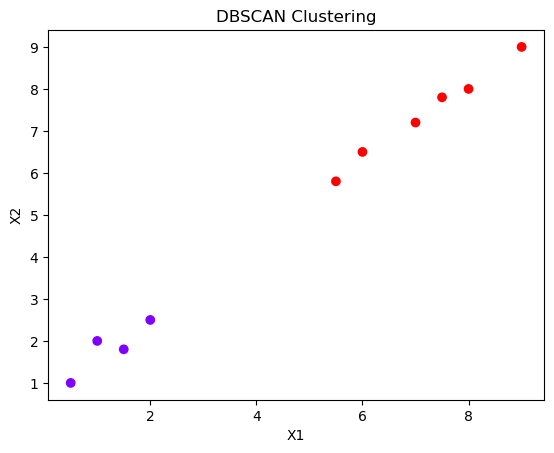

    X1   X2  Cluster
0  1.0  2.0        0
1  2.0  2.5        0
2  1.5  1.8        0
3  8.0  8.0        1
4  7.5  7.8        1
5  7.0  7.2        1
6  6.0  6.5        1
7  5.5  5.8        1
8  9.0  9.0        1
9  0.5  1.0        0


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {'X1': [1.0, 2.0, 1.5, 8.0, 7.5, 7.0, 6.0, 5.5, 9.0, 0.5],
        'X2': [2.0, 2.5, 1.8, 8.0, 7.8, 7.2, 6.5, 5.8, 9.0, 1.0]}

df = pd.DataFrame(data)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['Cluster'] = dbscan.fit_predict(df)

# Step 3: Plot the clusters
plt.scatter(df['X1'], df['X2'], c=df['Cluster'], cmap='rainbow', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Step 4: Display the result
print(df)


**Explanation**:
- **Step 1**: We create a simple 2D dataset with 10 points.
- **Step 2**: We apply DBSCAN with $ \epsilon = 1.5 $ and MinPoints = 3 to identify clusters.
- **Step 3**: We plot the clusters. Different colors represent different clusters, and outliers are usually marked with -1 as their cluster label.

---

#### 6. **Advantages and Disadvantages of DBSCAN**

**Advantages**:
- Does not require specifying the number of clusters in advance.
- Can find arbitrarily shaped clusters.
- Identifies outliers as noise points.
  
**Disadvantages**:
- Performance depends on choosing appropriate values for $ \epsilon $ and MinPoints.
- Struggles with varying densities of clusters.
- High-dimensional data can make it difficult to choose $ \epsilon $.

---

#### 7. **Choosing $ \epsilon $ Using the k-Nearest Neighbors (k-NN) Plot**

One common method to select $ \epsilon $ is to use the **k-nearest neighbors (k-NN) distance plot**:
1. Compute the distance to the k-th nearest neighbor for each point (commonly $ k = \text{MinPoints} - 1 $).
2. Sort the distances in ascending order and plot them.
3. Look for the "elbow" in the plot; the value at the elbow is a good estimate for $ \epsilon $.

Here’s how you can create a k-NN plot in Python:

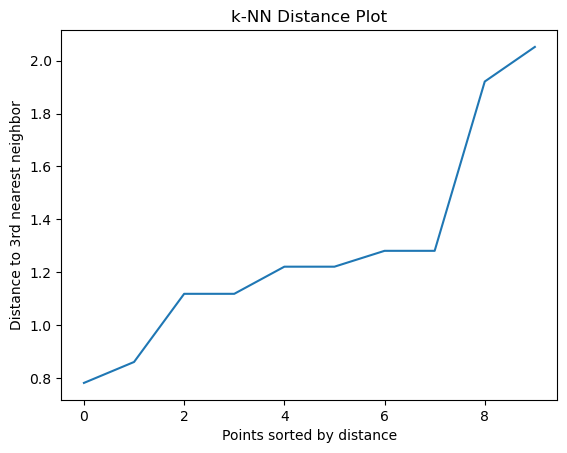

In [2]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset
X = df[['X1', 'X2']].values

# Compute the distances to the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances[:, 2])
plt.plot(distances)
plt.title('k-NN Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 3rd nearest neighbor')
plt.show()

---

#### 8. **Conclusion**

DBSCAN is an effective clustering algorithm, particularly when dealing with arbitrary shapes and outliers. Unlike K-Means, it doesn’t require specifying the number of clusters and can automatically identify noise points. However, the challenge lies in selecting appropriate parameters for $ \epsilon $ and MinPoints.

**Homework**:  
Apply DBSCAN on a larger dataset, use the k-NN distance plot to determine $ \epsilon $, and compare the results to K-Means clustering. Analyze the behavior of DBSCAN on different types of clusters and densities.
